## Setup

### Installing Dependencies

In [1]:
%pip install pydot
%pip install networkx 
%pip install graphviz
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



### Loading Dataset

In [2]:
import pandas as pd

dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

# Separate the dataset into features and target, and remove any columns with missing values
X = dataset.drop('target', axis=1)
y = dataset['target']
X = X.dropna(axis=1)

###  Code for Model Training and Model Evaluation

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

def fit_model(dataset, target, test_size, random_state_value, hidden_layer_sizes, activation,batch_size, learning_rate, learning_rate_init, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=test_size, random_state=random_state_value)

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        batch_size=batch_size,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=random_state_value,
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return y_test, y_pred, model, X_train, X_test


def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, precision, recall, f1, conf_matrix, class_report

## Hyperparameter Fine tuning

### Best Activation Function

In [4]:
import tqdm

results = {}

for activation_function in tqdm.tqdm(['identity', 'logistic', 'tanh', 'relu']):
    y_test, y_pred, model, X_train, X_test = fit_model(X, y, 0.2, 8, (50, 50), activation_function, 100, 'constant', 0.001, 1000)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[activation_function] = accuracy
    
activation_function_data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
activation_function_data = activation_function_data.sort_values('accuracy', ascending=False)
activation_function_data

100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


,accuracy
logistic,0.883598
relu,0.772487
tanh,0.764550
identity,0.587302


### Best Batch Size

In [5]:
import tqdm

results = {}
batch_sizes = [10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, "auto"]

for batch_size in tqdm.tqdm(batch_sizes):
    y_test, y_pred, model, X_train, X_test = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', batch_size, 'constant', 0.001, 1000)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[batch_size] = accuracy
    
batch_size_data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
batch_size_data = batch_size_data.sort_values('accuracy', ascending=False)
batch_size_data

100%|██████████| 12/12 [01:00<00:00,  5.03s/it]


,accuracy
200,0.923280
auto,0.923280
800,0.910053
80,0.888889
40,0.886243
100,0.883598
1000,0.878307
60,0.873016
600,0.857143
20,0.822751


### Best Learning Rate

In [6]:
import tqdm

results = {}

for learning_rate in tqdm.tqdm(['constant', 'invscaling', 'adaptive']):
    y_test, y_pred, model, X_train, X_test = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', 200, learning_rate, 0.001, 1000)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[learning_rate] = accuracy
    
learning_rate_data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
learning_rate_data = learning_rate_data.sort_values('accuracy', ascending=False)
learning_rate_data

100%|██████████| 3/3 [00:23<00:00,  7.96s/it]


,accuracy
constant,0.92328
invscaling,0.92328
adaptive,0.92328


### Best Number of Epoch

In [7]:
import tqdm

results = {}

for number_of_epoch in tqdm.tqdm(range(50, 2000, 50)):
    y_test_best, y_pred_best, model, X_train, X_test = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', batch_size, 'constant', 0.001, number_of_epoch)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[number_of_epoch] = accuracy
    
epoch_data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
epoch_data = epoch_data.sort_values('accuracy', ascending=False)
epoch_data

  0%|          | 0/39 [00:00<?, ?it/s]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
  3%|▎         | 1/39 [00:00<00:23,  1.62it/s]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
  5%|▌         | 2/39 [00:01<00:35,  1.05it/s]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
  8%|▊         | 3/39 [00:03<00:48,  1.34s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_percept

,accuracy
50,0.92328
1500,0.92328
1150,0.92328
1200,0.92328
1250,0.92328
1300,0.92328
1350,0.92328
1400,0.92328
1450,0.92328
1550,0.92328


### Best Hidden Layer Configuration

In [8]:
import tqdm

results = {}

for number_of_hidden_layers in tqdm.tqdm(range(1, 10)):
    for number_of_neurons in range(10, 100, 10):
        layer_sizes = tuple([number_of_neurons] * number_of_hidden_layers)
        y_test, y_pred, model, X_train, X_test = fit_model(X, y, 0.2, 8, layer_sizes, 'logistic', batch_size, 'constant', 0.001, 1000)
        accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
        results[str(number_of_hidden_layers) + "x" + str(number_of_neurons)] = accuracy
    
hidden_layer_config_data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
hidden_layer_config_data = hidden_layer_config_data.sort_values('accuracy', ascending=False)
hidden_layer_config_data

  0%|          | 0/9 [00:06<?, ?it/s]


KeyboardInterrupt: 

### Best Hyperparameter Report

In [8]:
best_hyperparameters = {
    'Hidden Layer Sizes': hidden_layer_config_data.index[0],
    'Activation': activation_function_data.index[0],
    'Batch Size': batch_size_data.index[0],
    'Learning Rate': learning_rate_data.index[0],
    'Epoch': epoch_data.index[0],
}

best_hyperparameters

{'Hidden Layer Sizes': '2x50',
 'Activation': 'logistic',
 'Batch Size': 200,
 'Learning Rate': 'constant',
 'Epoch': 50}

## Training Model using Optimal Hyperparameter

In [9]:
# Train the model with the best configuration
y_test_best, y_pred_best, model, X_train, X_test = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', 200, 'constant', 0.001, 1000)

# Evaluate the model
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test_best, y_pred_best)

### Model Evaluation

#### Metrics in Text

In [10]:

def display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix):
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {1 - accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix:")
    print(conf_matrix)

display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix)

Accuracy: 0.9233
Error Rate: 0.0767
Precision: 0.9239
Recall: 0.9233
F1-Score: 0.9233
Specificity: 0.9053

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       190
           1       0.91      0.94      0.92       188

    accuracy                           0.92       378
   macro avg       0.92      0.92      0.92       378
weighted avg       0.92      0.92      0.92       378


Confusion Matrix:
[[172  18]
 [ 11 177]]


#### Confusion Matrix, Accuracy, Precision, Recall and F-1 Score

[0.9232804232804233, 0.9238766899969086, 0.9232804232804233, 0.9232616272284757]


C:\Users\sarwi\AppData\Local\Temp\ipykernel_10104\100408012.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)


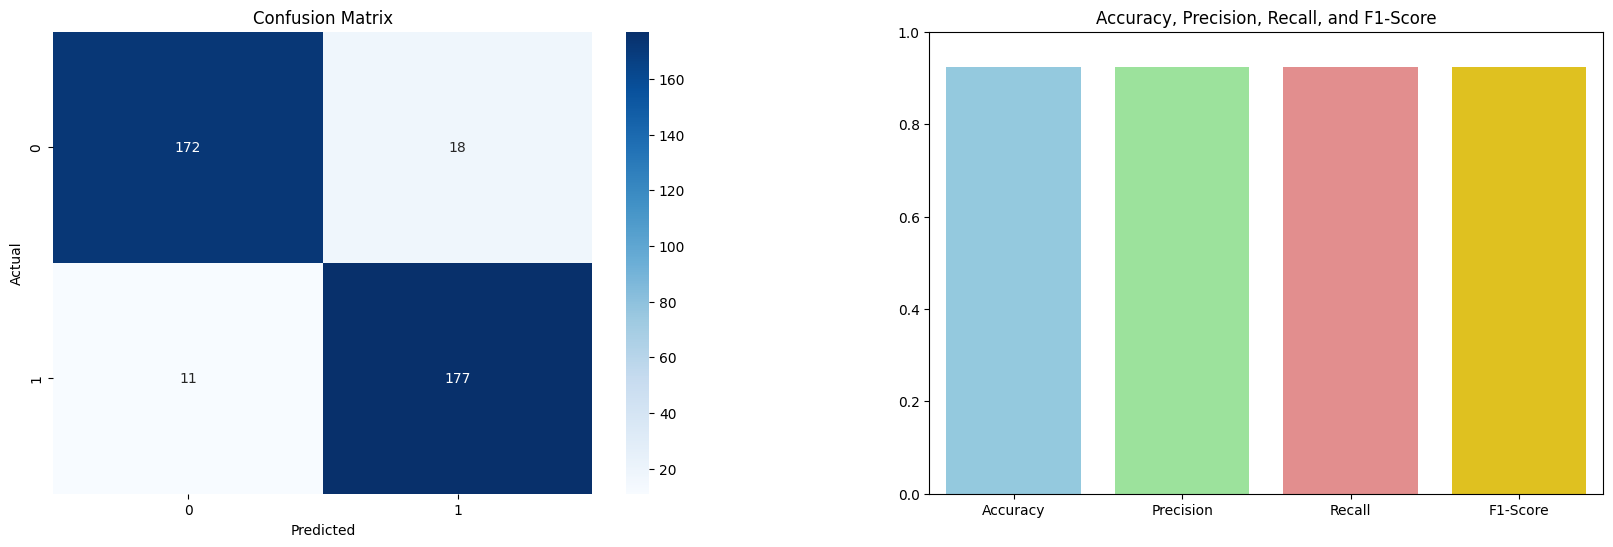

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix')

# Plot Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']  # Different colors for each bar

print(values)

sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)
axs[1].set_ylim(0, 1)
axs[1].set_title('Accuracy, Precision, Recall, and F1-Score')

plt.subplots_adjust(wspace=0.3)
plt.show()


#### Learning Curve

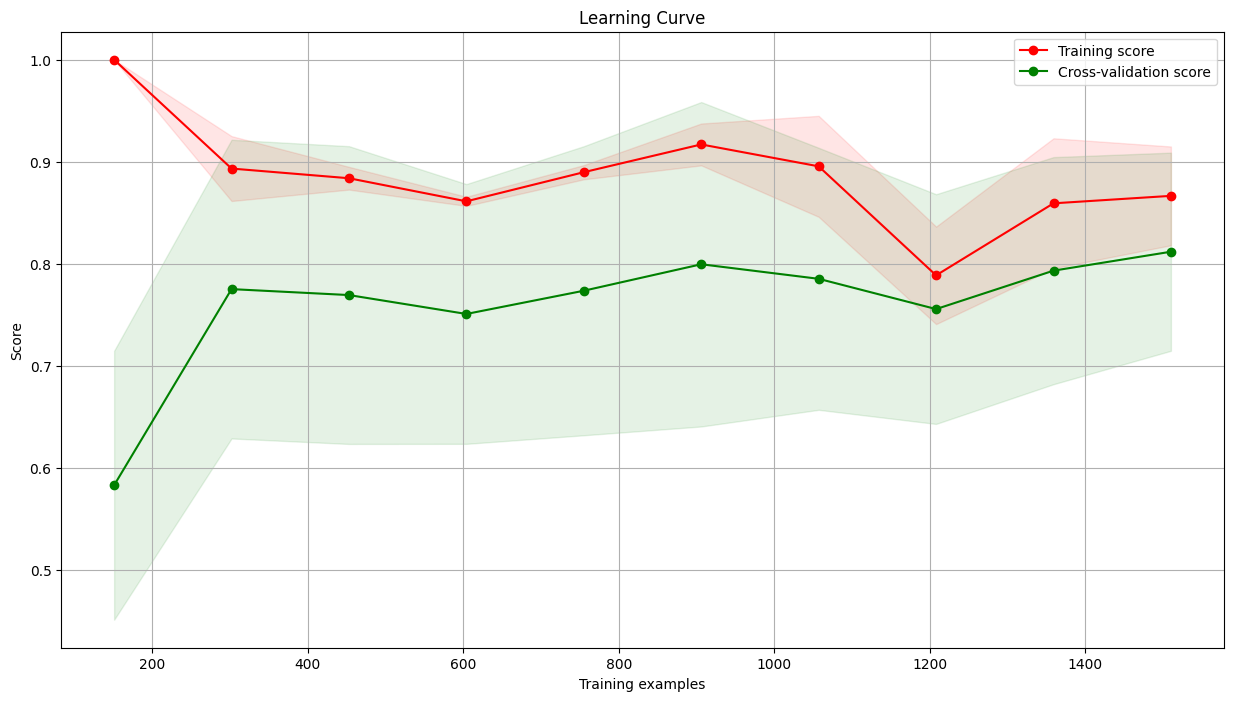

In [12]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(15, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


#### Feature Importance

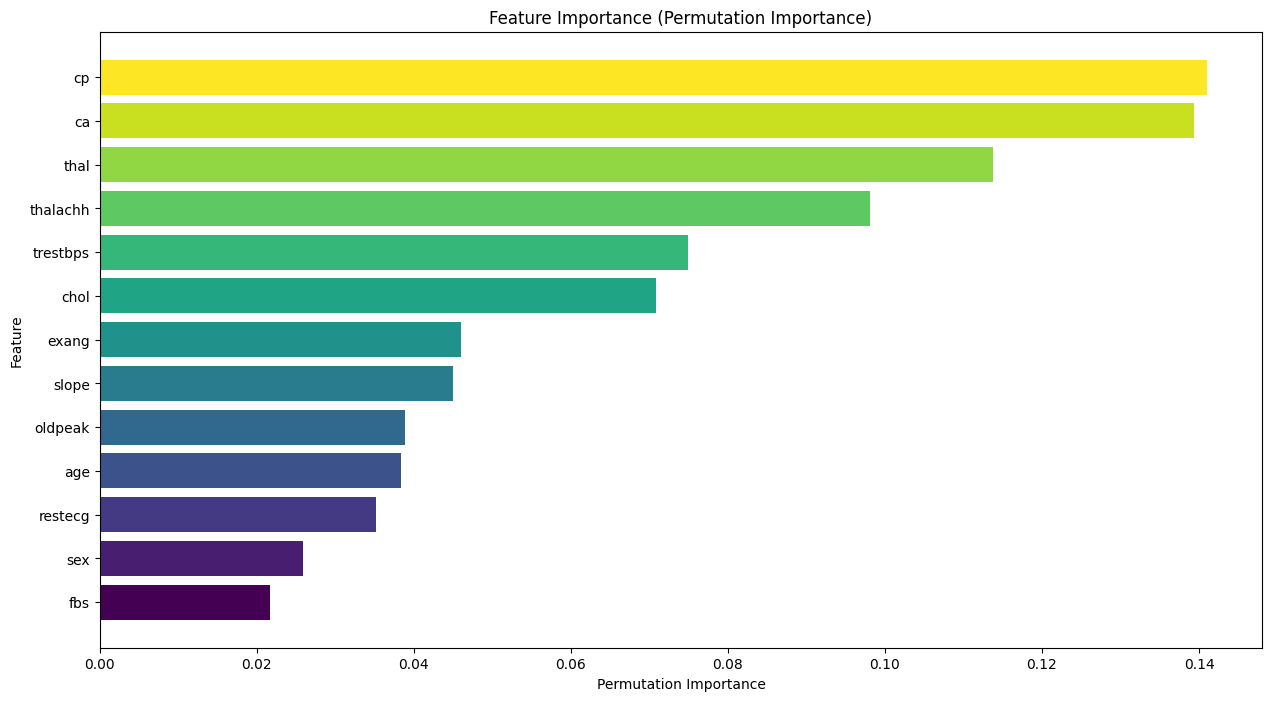

In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# get feature importance and sort them
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# create color map
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

# Plot feature importances with different colors for each bar
plt.figure(figsize=(15, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color=colors)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance)')
plt.show()
